In [227]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from siuba.dply.forcats import fct_lump, fct_reorder 

In [119]:
ks1 = pd.read_csv('ks-projects-201612.csv', engine='python')
ks2 = pd.read_csv('ks-projects-201801.csv', engine='python')

In [120]:
ks1.tail()

ID                                               name   \
323745  999976400  ChknTruk Nationwide Charity Drive 2014 (Canceled)   
323746  999977640                                          The Tribe   
323747  999986353  Walls of Remedy- New lesbian Romantic Comedy f...   
323748  999987933                           BioDefense Education Kit   
323749  999988282                  Nou Renmen Ayiti!  We Love Haiti!   

              category  main_category  currency             deadline   goal   \
323745      Documentary   Film & Video       USD  2014-10-17 02:35:30  50000   
323746   Narrative Film   Film & Video       USD  2011-07-19 03:35:14   1500   
323747   Narrative Film   Film & Video       USD  2010-08-16 05:59:00  15000   
323748       Technology     Technology       USD  2016-02-13 02:00:00  15000   
323749  Performance Art            Art       USD  2011-08-16 09:07:47   2000   

                  launched  pledged     state  backers  country  usd pledged   \
323745  2014-09-17 02:35:30       25  canceled        1       US           25   
323746  2011-06-22 03:35:14      155    failed        5       US          155   
323747  2010-07-01 19:40:30       20    failed        1       US           20   
323748  2016-01-13 18:13:53      200    failed        6       US          200   
323749  2011-07-19 09:07:47      524    failed       17       US          524   

       Unnamed: 13 Unnamed: 14 Unnamed: 15  Unnamed: 16  
323745         NaN         NaN         NaN          NaN  
323746         NaN         NaN         NaN          NaN  
323747         NaN         NaN         NaN          NaN  
323748         NaN         NaN         NaN          NaN  
323749         NaN         NaN         NaN          NaN

In [121]:
ks2.tail()

ID                                               name  \
378656  999976400  ChknTruk Nationwide Charity Drive 2014 (Canceled)   
378657  999977640                                          The Tribe   
378658  999986353  Walls of Remedy- New lesbian Romantic Comedy f...   
378659  999987933                           BioDefense Education Kit   
378660  999988282                  Nou Renmen Ayiti!  We Love Haiti!   

               category main_category currency    deadline     goal  \
378656      Documentary  Film & Video      USD  2014-10-17  50000.0   
378657   Narrative Film  Film & Video      USD  2011-07-19   1500.0   
378658   Narrative Film  Film & Video      USD  2010-08-16  15000.0   
378659       Technology    Technology      USD  2016-02-13  15000.0   
378660  Performance Art           Art      USD  2011-08-16   2000.0   

                   launched  pledged     state  backers country  usd pledged  \
378656  2014-09-17 02:35:30     25.0  canceled        1      US         25.0   
378657  2011-06-22 03:35:14    155.0    failed        5      US        155.0   
378658  2010-07-01 19:40:30     20.0    failed        1      US         20.0   
378659  2016-01-13 18:13:53    200.0    failed        6      US        200.0   
378660  2011-07-19 09:07:47    524.0    failed       17      US        524.0   

        usd_pledged_real  usd_goal_real  
378656              25.0        50000.0  
378657             155.0         1500.0  
378658              20.0        15000.0  
378659             200.0        15000.0  
378660             524.0         2000.0

In [5]:
ks1.shape

(323750, 17)

In [6]:
ks2.shape

(378661, 15)

In [122]:
ks3 = ks1.drop(columns= ['Unnamed: 13','Unnamed: 14', 'Unnamed: 15',  'Unnamed: 16'])

In [123]:
ks3.head()

ID                                               name   \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000004038                                     Where is Hank?   
2  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
3  1000011046  Community Film Project: The Art of Neighborhoo...   
4  1000014025                               Monarch Espresso Bar   

        category  main_category  currency             deadline   goal   \
0          Poetry     Publishing       GBP  2015-10-09 11:36:00   1000   
1  Narrative Film   Film & Video       USD  2013-02-26 00:20:50  45000   
2           Music          Music       USD  2012-04-16 04:24:11   5000   
3    Film & Video   Film & Video       USD  2015-08-29 01:00:00  19500   
4     Restaurants           Food       USD  2016-04-01 13:38:27  50000   

             launched  pledged       state  backers  country  usd pledged   
0  2015-08-11 12:12:28        0      failed        0       GB            0  
1  2013-01-12 00:20:50      220      failed        3       US          220  
2  2012-03-17 03:24:11        1      failed        1       US            1  
3  2015-07-04 08:35:03     1283    canceled       14       US         1283  
4  2016-02-26 13:38:27    52375  successful      224       US        52375

In [9]:
ks4 = ks2.drop(ks2.columns[[13, 14]], axis= 1)

In [124]:
ks5.tail()

ID  name  category  main_category  currency  deadline  goal   \
702406  NaN   NaN       NaN            NaN       NaN       NaN   NaN   
702407  NaN   NaN       NaN            NaN       NaN       NaN   NaN   
702408  NaN   NaN       NaN            NaN       NaN       NaN   NaN   
702409  NaN   NaN       NaN            NaN       NaN       NaN   NaN   
702410  NaN   NaN       NaN            NaN       NaN       NaN   NaN   

       launched  pledged  state   ... main_category currency    deadline  \
702406       NaN      NaN    NaN  ...  Film & Video      USD  2014-10-17   
702407       NaN      NaN    NaN  ...  Film & Video      USD  2011-07-19   
702408       NaN      NaN    NaN  ...  Film & Video      USD  2010-08-16   
702409       NaN      NaN    NaN  ...    Technology      USD  2016-02-13   
702410       NaN      NaN    NaN  ...           Art      USD  2011-08-16   

           goal             launched pledged     state backers country  \
702406  50000.0  2014-09-17 02:35:30    25.0  canceled     1.0      US   
702407   1500.0  2011-06-22 03:35:14   155.0    failed     5.0      US   
702408  15000.0  2010-07-01 19:40:30    20.0    failed     1.0      US   
702409  15000.0  2016-01-13 18:13:53   200.0    failed     6.0      US   
702410   2000.0  2011-07-19 09:07:47   524.0    failed    17.0      US   

        usd pledged  
702406         25.0  
702407        155.0  
702408         20.0  
702409        200.0  
702410        524.0  

[5 rows x 26 columns]

In [143]:
ks = pd.read_csv('ks_combo.csv')

In [144]:
ks.shape

(702411, 13)

In [145]:
ks.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline   goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000   
1  Narrative Film  Film & Video      USD  2017-11-01  30000   
2  Narrative Film  Film & Video      USD  2013-02-26  45000   
3           Music         Music      USD  2012-04-16   5000   
4    Film & Video  Film & Video      USD  2015-08-29  19500   

              launched pledged     state backers country usd.pledged  
0  2015-08-11 12:12:28       0    failed       0      GB           0  
1  2017-09-02 04:43:57    2421    failed      15      US         100  
2  2013-01-12 00:20:50     220    failed       3      US         220  
3  2012-03-17 03:24:11       1    failed       1      US           1  
4  2015-07-04 08:35:03    1283  canceled      14      US        1283

In [146]:
ks.tail()

ID                                               name  \
702406  999976400  ChknTruk Nationwide Charity Drive 2014 (Canceled)   
702407  999977640                                          The Tribe   
702408  999986353  Walls of Remedy- New lesbian Romantic Comedy f...   
702409  999987933                           BioDefense Education Kit   
702410  999988282                  Nou Renmen Ayiti!  We Love Haiti!   

               category main_category currency             deadline   goal  \
702406      Documentary  Film & Video      USD  2014-10-17 02:35:30  50000   
702407   Narrative Film  Film & Video      USD  2011-07-19 03:35:14   1500   
702408   Narrative Film  Film & Video      USD  2010-08-16 05:59:00  15000   
702409       Technology    Technology      USD  2016-02-13 02:00:00  15000   
702410  Performance Art           Art      USD  2011-08-16 09:07:47   2000   

                   launched pledged     state backers country usd.pledged  
702406  2014-09-17 02:35:30      25  canceled       1      US          25  
702407  2011-06-22 03:35:14     155    failed       5      US         155  
702408  2010-07-01 19:40:30      20    failed       1      US          20  
702409  2016-01-13 18:13:53     200    failed       6      US         200  
702410  2011-07-19 09:07:47     524    failed      17      US         524

In [147]:
ks['state'].value_counts()

failed        365940
successful    247037
canceled       71133
live            7227
undefined       7117
               ...  
8084               1
1301               1
722                1
721                1
25651.99           1
Name: state, Length: 410, dtype: int64

In [148]:
ks['main_category'].value_counts()

Film & Video       121264
Music               98662
Publishing          74107
Games               63239
Technology          58697
                    ...  
 Restore Pride          1
Drinks                  1
Photobooks              1
Gaming Hardware         1
Flight                  1
Name: main_category, Length: 120, dtype: int64

In [149]:
ks['main_category'] = fct_lump(ks['main_category'], n= 11)

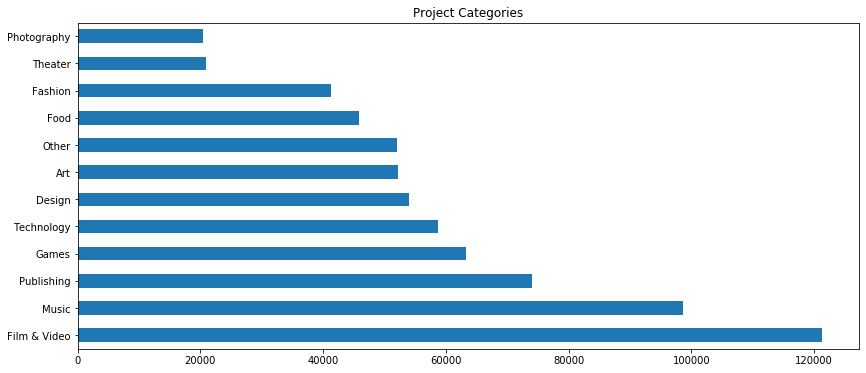

In [150]:
ks['main_category'].value_counts().plot(kind='barh', figsize=(14,6), title='Project Categories')

In [151]:
ks['currency'] = fct_lump(ks['currency'], n= 11)

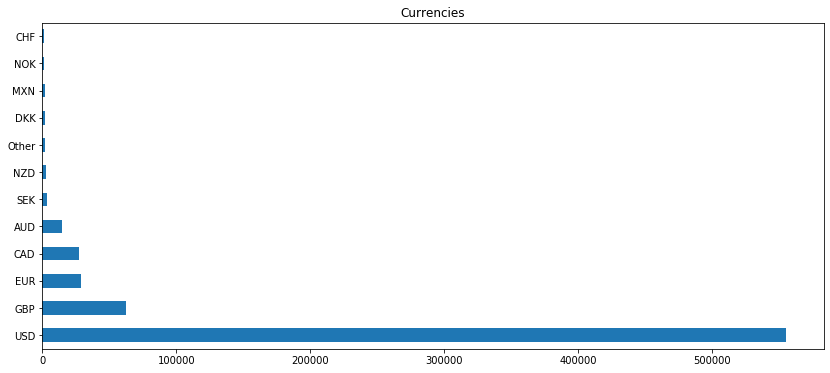

In [152]:
ks['currency'].value_counts().plot(kind='barh', figsize=(14,6), title='Currencies')

In [153]:
ks['country'] = fct_lump(ks['country'], n= 9)

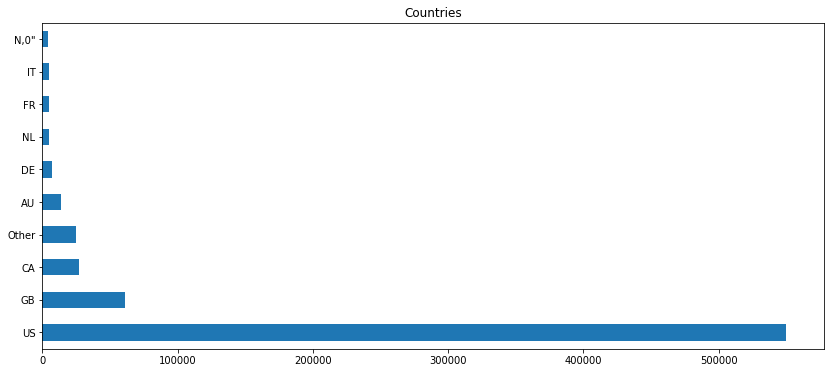

In [154]:
ks['country'].value_counts().plot(kind='barh', figsize=(14,6), title='Countries')

In [155]:
ks['country'].value_counts()

US       550192
GB        61181
CA        26748
Other     24959
AU        14075
DE         6855
NL         5127
FR         4849
IT         4628
N,0"       3797
Name: country, dtype: int64

In [156]:
ks['state'].isnull().sum()

0

In [200]:
ks['state'].isna().sum()

0

In [201]:
def state (series):
    if series == 'successful':
        return 'successful'
    else:
        return 'failed'

ks['state_lump'] = ks['state'].apply(state)

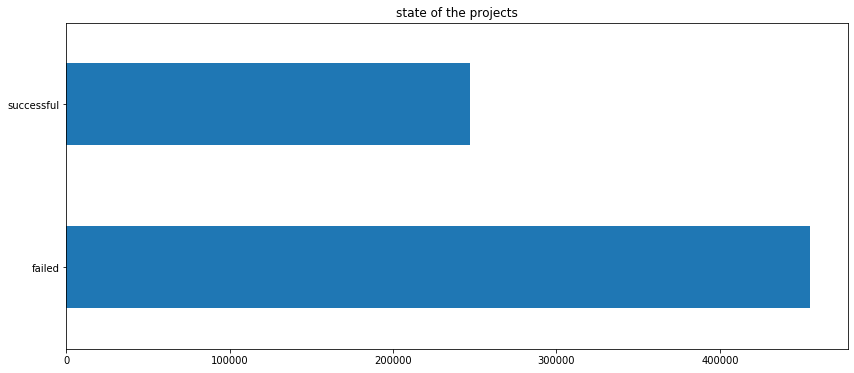

In [261]:
ks['state_lump'].value_counts().plot(kind='barh', figsize=(14,6), title='state of the projects')

In [265]:
ks.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency   deadline   goal  \
0          Poetry    Publishing      GBP 2015-10-09   1000   
1  Narrative Film  Film & Video      USD 2017-11-01  30000   
2  Narrative Film  Film & Video      USD 2013-02-26  45000   
3           Music         Music      USD 2012-04-16   5000   
4    Film & Video  Film & Video      USD 2015-08-29  19500   

             launched pledged     state backers country usd.pledged  \
0 2015-08-11 12:12:28       0    failed       0      GB           0   
1 2017-09-02 04:43:57    2421    failed      15      US         100   
2 2013-01-12 00:20:50     220    failed       3      US         220   
3 2012-03-17 03:24:11       1    failed       1      US           1   
4 2015-07-04 08:35:03    1283  canceled      14      US        1283   

  state_lump  launched_year  launched_month  launched_day  
0     failed         2015.0             8.0          11.0  
1     failed         2017.0             9.0           2.0  
2     failed         2013.0             1.0          12.0  
3     failed         2012.0             3.0          17.0  
4     failed         2015.0             7.0           4.0

In [203]:
from datetime import datetime
from datetime import timedelta

In [204]:
ks['launched'] = pd.to_datetime(ks['launched'], format='%Y-%m-%d', errors='coerce' )
ks['deadline'] = pd.to_datetime(ks['deadline'], format='%Y-%m-%d', errors='coerce' )

In [205]:
ks['launched_year']=ks['launched'].dt.year
ks['launched_year'].dropna(inplace=True)
ks['launched_year'] = ks['launched_year'].astype(int)

In [206]:
ks['launched_month']=ks['launched'].dt.month

In [207]:
ks['launched_day']=ks['launched'].dt.day

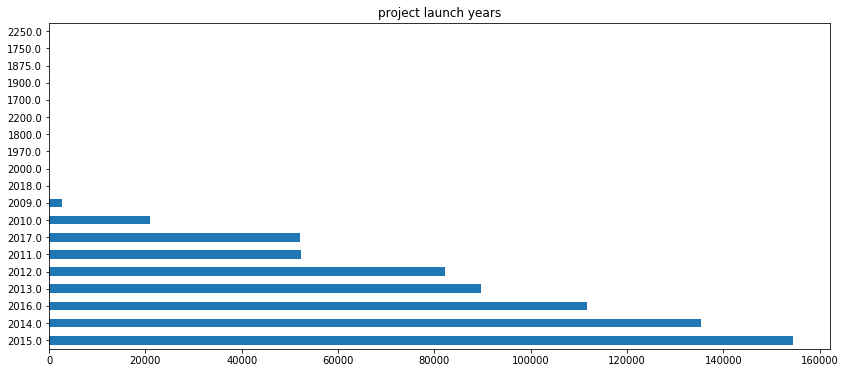

In [208]:
ks['launched_year'].value_counts().plot(kind='barh', figsize=(14,6), title='project launch years')

In [209]:
# visualize the date between years 2009-2017
a = ks[(ks['launched_year'] < 2018) & (ks['launched_year'] > 2007)]
a.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency   deadline   goal  \
0          Poetry    Publishing      GBP 2015-10-09   1000   
1  Narrative Film  Film & Video      USD 2017-11-01  30000   
2  Narrative Film  Film & Video      USD 2013-02-26  45000   
3           Music         Music      USD 2012-04-16   5000   
4    Film & Video  Film & Video      USD 2015-08-29  19500   

             launched pledged     state backers country usd.pledged  \
0 2015-08-11 12:12:28       0    failed       0      GB           0   
1 2017-09-02 04:43:57    2421    failed      15      US         100   
2 2013-01-12 00:20:50     220    failed       3      US         220   
3 2012-03-17 03:24:11       1    failed       1      US           1   
4 2015-07-04 08:35:03    1283  canceled      14      US        1283   

  state_lump  launched_year  launched_month  launched_day  
0     failed         2015.0             8.0          11.0  
1     failed         2017.0             9.0           2.0  
2     failed         2013.0             1.0          12.0  
3     failed         2012.0             3.0          17.0  
4     failed         2015.0             7.0           4.0

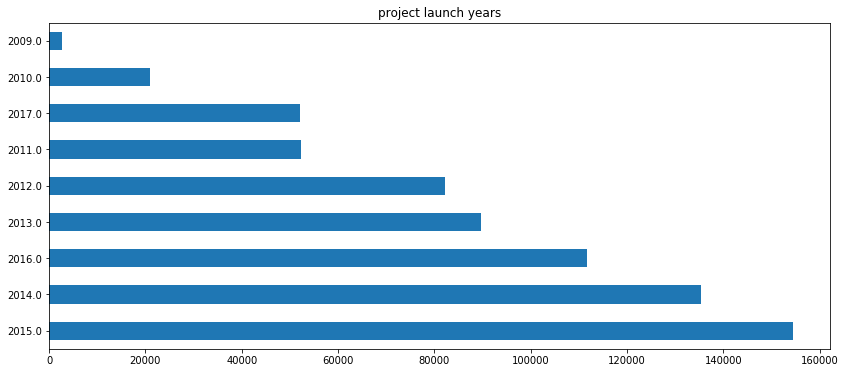

In [210]:
a['launched_year'].value_counts().plot(kind='barh', figsize=(14,6), title='project launch years')

In [264]:
ks_dummy = pd.get_dummies(ks, columns = ['main_category','state_lump', 'currency', 'country' ], drop_first = True)

print(list(ks_dummy.columns))


['ID', 'name', 'category', 'deadline', 'goal', 'launched', 'pledged', 'state', 'backers', 'usd.pledged', 'launched_year', 'launched_month', 'launched_day', 'main_category_Art', 'main_category_Design', 'main_category_Fashion', 'main_category_Film & Video', 'main_category_Food', 'main_category_Games', 'main_category_Music', 'main_category_Photography', 'main_category_Publishing', 'main_category_Technology', 'main_category_Theater', 'state_lump_successful', 'currency_AUD', 'currency_CAD', 'currency_CHF', 'currency_DKK', 'currency_EUR', 'currency_GBP', 'currency_MXN', 'currency_NOK', 'currency_NZD', 'currency_SEK', 'currency_USD', 'country_AU', 'country_CA', 'country_DE', 'country_FR', 'country_GB', 'country_IT', 'country_N,0"', 'country_NL', 'country_US']


In [212]:
ks_dummy.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category   deadline   goal            launched pledged     state  \
0          Poetry 2015-10-09   1000 2015-08-11 12:12:28       0    failed   
1  Narrative Film 2017-11-01  30000 2017-09-02 04:43:57    2421    failed   
2  Narrative Film 2013-02-26  45000 2013-01-12 00:20:50     220    failed   
3           Music 2012-04-16   5000 2012-03-17 03:24:11       1    failed   
4    Film & Video 2015-08-29  19500 2015-07-04 08:35:03    1283  canceled   

  backers usd.pledged  ...  currency_USD  country_AU  country_CA  country_DE  \
0       0           0  ...             0           0           0           0   
1      15         100  ...             1           0           0           0   
2       3         220  ...             1           0           0           0   
3       1           1  ...             1           0           0           0   
4      14        1283  ...             1           0           0           0   

   country_FR  country_GB  country_IT  country_N,0"  country_NL  country_US  
0           0           1           0             0           0           0  
1           0           0           0             0           0           1  
2           0           0           0             0           0           1  
3           0           0           0             0           0           1  
4           0           0           0             0           0           1  

[5 rows x 45 columns]

In [312]:
ks_dummy['deadline']=pd.to_datetime(ks_dummy['deadline'], format="%Y/%m/%d",  errors='coerce').dt.date
ks_dummy['launched']=pd.to_datetime(ks_dummy['launched'], format="%Y/%m/%d").dt.date


ks_dummy['longevity'] = (ks_dummy['deadline'] - ks_dummy['launched']).dt.days

ks_dummy.longevity.head()

0    59.0
1    60.0
2    45.0
3    30.0
4    56.0
Name: longevity, dtype: float64

In [314]:
# How many days from launch day to deadline has passed for each project. 

In [315]:
ks_mean = ks[['main_category','pledged']]

In [316]:
ks_mean1 = pd.to_numeric(ks_mean['pledged'] , errors='coerce').groupby(ks_mean['main_category']).mean()

In [317]:
ks_mean1 = pd.DataFrame(ks_mean1)
sorted_pledge = ks_mean1.sort_values('pledged', ascending=False)
print(sorted_pledge)

                    pledged
main_category              
Design         25788.671833
Technology     21848.222988
Games          21351.519171
Fashion         6327.620362
Film & Video    6269.469818
Food            5217.865902
Other           4200.032061
Theater         4022.504375
Music           3919.288843
Publishing      3477.816587
Photography     3462.573504
Art             3420.555728


Design, Technology and Games have the highest mean of pledged money. The trio is the leader of categories by far!

In [318]:
ks_dummy['category'] = fct_lump(ks_dummy['category'], n= 11)
ks_days = ks_dummy[['category','longevity']]
ks_days = pd.to_numeric(ks_days['longevity'] , errors='coerce').groupby(ks_days['category']).mean()
ks_days = pd.DataFrame(ks_days)
sorted_days = ks_days.sort_values('longevity', ascending = False)
print(sorted_days)

                longevity
category                 
Film & Video    39.384416
Documentary     37.135933
Music           36.267666
Product Design  34.971752
Other           34.469886
Fiction         34.090575
Video Games     34.036320
Food            33.980114
Fashion         33.432945
Shorts          33.360429
Tabletop Games  31.194190


In [319]:
#Film & Video projects has longest campaign days

In [320]:
ks_mean2 = pd.to_numeric(ks['backers'] , errors='coerce').groupby(ks['main_category']).mean()
ks_mean2 = pd.DataFrame(ks_mean2)
sorted_backers = ks_mean2.sort_values('backers', ascending = False)
print(sorted_backers)

                  backers
main_category            
Games          322.834224
Design         239.612552
Technology     165.021999
Other           73.767558
Film & Video    66.234488
Fashion         61.812661
Publishing      54.273865
Food            54.262380
Music           51.784795
Theater         47.227210
Art             40.934986
Photography     38.603581


Design, Technology and Games have the highest mean of number of backers. The trio is leader for pledged mean as well, so we can understand the strong correlation of number of backers and pledged amount. 

In [321]:
import csv


filename = 'ks_dummy_coded.csv'
with open (filename, 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(list(ks_dummy.columns))
    csvwriter.writerows(ks_dummy)
    # I can not believe writing data to csv in python is so much painful!!!

# Statistical Tests

Hypothesis: According to Kickstarter website stats, around 60% of the projects have failed. We want to test if this statistic is represented in our data using Goodness of Fit Chi-Squares test. (Source: https://www.kickstarter.com/help/stats)


In [322]:
import scipy, scipy.stats

In [323]:
ks.state_lump.value_counts()

failed        455374
successful    247037
Name: state_lump, dtype: int64

In [324]:
observed_values = scipy.array([455374, 247037])
expected_values = scipy.array([421446, 280965])

C:\Users\burhan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  """Entry point for launching an IPython kernel.
C:\Users\burhan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  


In [325]:
scipy.stats.chisquare(observed_values, f_exp=expected_values)

Power_divergenceResult(statistic=6828.3168294956, pvalue=0.0)

According to Goodness of Fit Chi-Squares test, Our data is significantly different than Kickstarter source data. Most likely the reason for this difference is we gathered all the values other than 'successfull' as 'failed ' under state column. 

Independent Chi-Square
Hypothesis: Main category and project state are independent. 

In [326]:
category_crosstab = pd.crosstab(ks['main_category'], ks['state_lump'])
category_crosstab


state_lump     failed  successful
main_category                    
Other           31536       20447
Art             30964       21164
Design          35433       18509
Fashion         31311        9903
Film & Video    76237       45027
Food            34490       11341
Games           41336       21903
Music           52702       45960
Photography     14251        6208
Publishing      51552       22555
Technology      47201       11496
Theater          8361       12524

Crosstab for Main category and project state. Table shows frequencies for main category. 
Assumption of 5 cases per expected cell is passed easily. 

In [327]:
stats.chi2_contingency(category_crosstab)

(24186.5769647064,
 0.0,
 11,
 array([[33700.64910999, 18282.35089001],
        [33794.65280584, 18333.34719416],
        [34970.67145589, 18971.32854411],
        [26719.09186502, 14494.90813498],
        [78615.61498325, 42648.38501675],
        [29712.2992009 , 16118.7007991 ],
        [40997.92911273, 22241.07088727],
        [63962.70785623, 34699.29214377],
        [13263.59733262,  7195.40266738],
        [48043.66819141, 26063.33180859],
        [38053.34437815, 20643.65562185],
        [13539.77370799,  7345.22629201]]))

our p value is significant which means independence is rejected, there is significant correlations between main category and project state. 

In [328]:
country_crosstab = pd.crosstab(ks['country'], ks['state_lump'])
country_crosstab

state_lump  failed  successful
country                       
Other        19749        5210
AU           10615        3460
CA           19547        7201
DE            5388        1467
FR            3429        1420
GB           39774       21407
IT            3957         671
N,0"          3692         105
NL            4100        1027
US          345123      205069

In [329]:
stats.chi2_contingency(country_crosstab)

(8569.608152574416,
 0.0,
 9,
 array([[ 16180.95341047,   8778.04658953],
        [  9124.84151017,   4950.15848983],
        [ 17340.76452675,   9407.23547325],
        [  4444.10575859,   2410.89424141],
        [  3143.61324922,   1705.38675078],
        [ 39663.72493312,  21517.27506688],
        [  3000.33865073,   1627.66134927],
        [  2461.60022836,   1335.39977164],
        [  3323.8410247 ,   1803.1589753 ],
        [356690.21670788, 193501.78329212]]))

Independence is rejected. Correlation between country and state of the project is significant. 


In [330]:
currency_crosstab = pd.crosstab(ks['currency'], ks['state_lump'])
currency_crosstab


state_lump  failed  successful
currency                      
Other         1614         447
AUD          10835        3462
CAD          19952        7207
CHF            973         273
DKK           1375         595
EUR          22863        6097
GBP          40665       21435
MXN           1568         398
NOK            990         272
NZD           1861         778
SEK           2244         844
USD         350434      205229

In [331]:
stats.chi2_contingency(currency_crosstab)

(5638.724200233166,
 0.0,
 11,
 array([[  1336.14908366,    724.85091634],
        [  9268.76441001,   5028.23558999],
        [ 17607.21638186,   9551.78361814],
        [   807.78348289,    438.21651711],
        [  1277.15366075,    692.84633925],
        [ 18774.80711435,  10185.19288565],
        [ 40259.51387436,  21840.48612564],
        [  1274.56045535,    691.43954465],
        [   818.1563045 ,    443.8436955 ],
        [  1710.86726432,    928.13273568],
        [  2001.95457076,   1086.04542924],
        [360237.0733972 , 195425.9266028 ]]))

as expected, currency and state of the project are not independent, so they are correlated. 

In [332]:
test_crosstab = pd.crosstab(ks['country'], ks['main_category'])
test_crosstab

main_category  Other    Art  Design  Fashion  Film & Video   Food  Games  \
country                                                                    
Other           1831   1397    2473     1494          2998   1279   2790   
AU               914    744    1604     1279          1731    897   1696   
CA              2245   1944    2691     1852          3154   1956   3373   
DE               394    365     889      462           529    390   1072   
FR               280    287     490      414           455    239    811   
GB              4491   4801    4803     4230         10783   3003   7157   
IT               259    295     604      468           330    311    590   
N,0"               2      0       3        4           888      3      5   
NL               252    344     589      484           388    333    717   
US             41315  41951   39796    30527        100008  37420  45028   

main_category  Music  Photography  Publishing  Technology  Theater  
country                                                             
Other           4040          570        2329        3441      317  
AU               863          539        1477        2199      132  
CA              2153          749        2798        3473      360  
DE               499          361         481        1366       47  
FR               295          172         281        1096       29  
GB              5054         2287        5892        5606     3074  
IT               267          220         296         950       38  
N,0"            2388            1         495           7        1  
NL               348          183         359        1090       40  
US             82755        15377       59699       39469    16847

In [333]:
stats.chi2_contingency(test_crosstab)

(31096.009521422,
 0.0,
 99,
 array([[ 1847.12895584,  1852.28128831,  1916.73874413,  1464.47055356,
          4308.91340825,  1628.52792596,  2247.09208854,  3505.78914339,
           726.97634433,  2633.26829022,  2085.69971569,   742.11354179],
        [ 1041.64189485,  1044.54742309,  1080.89658334,   825.85131782,
          2429.90329024,   918.36734476,  1267.19103915,  1977.00157031,
           409.96001629,  1484.96539063,  1176.17787164,   418.49625789],
        [ 1979.52663611,  1985.04827516,  2054.12588356,  1569.44021663,
          4617.76576961,  1745.25681973,  2408.15814673,  3757.07552416,
           779.08422846,  2822.01451287,  2235.19756382,   795.30642316],
        [  507.31475589,   508.7298462 ,   526.43311395,   402.21746243,
          1183.44490619,   447.27588976,   617.16480095,   962.86648415,
           199.66436317,   723.22825952,   572.83831688,   203.82180091],
        [  358.85765884,   359.85864686,   372.38135223,   284.51531368,
           837.129

Two sampled t-test Hypothesis: 

In [334]:
from scipy.stats import ttest_ind

In [335]:
scipy.stats.ttest_ind(ks['state_lump'] == 'failed', ks['state_lump'] == 'successful', equal_var=False)

Ttest_indResult(statistic=368.11340576261455, pvalue=0.0)

In [336]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [337]:
ks.loc[:,'pledged'].describe()

count     702411
unique    112634
top            0
freq       52804
Name: pledged, dtype: object

test the mean of pledge difference for main categories or countries. pd.to_numeric(df4['Sales']).groupby(df4['Company'])

In [338]:
# Try anova test longevity and pledged values.
print(list(ks_dummy))

['ID', 'name', 'category', 'deadline', 'goal', 'launched', 'pledged', 'state', 'backers', 'usd.pledged', 'launched_year', 'launched_month', 'launched_day', 'main_category_Art', 'main_category_Design', 'main_category_Fashion', 'main_category_Film & Video', 'main_category_Food', 'main_category_Games', 'main_category_Music', 'main_category_Photography', 'main_category_Publishing', 'main_category_Technology', 'main_category_Theater', 'state_lump_successful', 'currency_AUD', 'currency_CAD', 'currency_CHF', 'currency_DKK', 'currency_EUR', 'currency_GBP', 'currency_MXN', 'currency_NOK', 'currency_NZD', 'currency_SEK', 'currency_USD', 'country_AU', 'country_CA', 'country_DE', 'country_FR', 'country_GB', 'country_IT', 'country_N,0"', 'country_NL', 'country_US', 'longevity']


In [339]:
ks7 = ks_dummy[['pledged', 'backers', 'longevity', 'goal']]
ks7 = pd.DataFrame(ks7)
ks7['backers'] = pd.to_numeric(ks7[ 'backers'] , errors='coerce')
ks7['pledged'] = pd.to_numeric(ks7['pledged'] , errors='coerce')
ks7['goal'] = pd.to_numeric(ks7[ 'goal'] , errors='coerce')



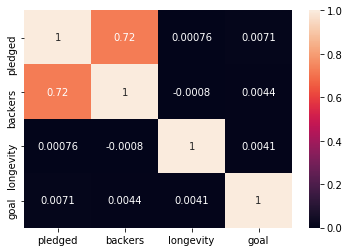

In [340]:
sns.heatmap(ks7.corr(), annot=True)


# modeling with sklearn

In [341]:
from sklearn import svm
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [342]:
ks.isnull().sum()/ks.shape[0]
#ks = ks.dropna(axis=0, subset=['name', 'category', 'main_category', 'currency', ])

ID                0.000000
name              0.000011
category          0.000007
main_category     0.000000
currency          0.000000
deadline          0.000900
goal              0.000000
launched          0.000830
pledged           0.000000
state             0.000000
backers           0.000000
country           0.000000
usd.pledged       0.010801
state_lump        0.000000
launched_year     0.000830
launched_month    0.000830
launched_day      0.000830
dtype: float64

In [343]:
# 1% of pledged data is NULL 

In [344]:
ks_dummy.isna().sum()

ID                               0
name                             8
category                         5
deadline                       632
goal                             0
launched                       583
pledged                          0
state                            0
backers                          0
usd.pledged                   7587
launched_year                  583
launched_month                 583
launched_day                   583
main_category_Art                0
main_category_Design             0
main_category_Fashion            0
main_category_Film & Video       0
main_category_Food               0
main_category_Games              0
main_category_Music              0
main_category_Photography        0
main_category_Publishing         0
main_category_Technology         0
main_category_Theater            0
state_lump_successful            0
currency_AUD                     0
currency_CAD                     0
currency_CHF                     0
currency_DKK        

Univariate Feature Selection Method with SelectKBest

In [353]:
print(list(ks_dummy))

['ID', 'name', 'category', 'deadline', 'goal', 'launched', 'pledged', 'state', 'backers', 'usd.pledged', 'launched_year', 'launched_month', 'launched_day', 'main_category_Art', 'main_category_Design', 'main_category_Fashion', 'main_category_Film & Video', 'main_category_Food', 'main_category_Games', 'main_category_Music', 'main_category_Photography', 'main_category_Publishing', 'main_category_Technology', 'main_category_Theater', 'state_lump_successful', 'currency_AUD', 'currency_CAD', 'currency_CHF', 'currency_DKK', 'currency_EUR', 'currency_GBP', 'currency_MXN', 'currency_NOK', 'currency_NZD', 'currency_SEK', 'currency_USD', 'country_AU', 'country_CA', 'country_DE', 'country_FR', 'country_GB', 'country_IT', 'country_N,0"', 'country_NL', 'country_US', 'longevity']


In [286]:
remove_col = ['ID', 'name', 'category', 'deadline','launched','state']
ks_dummy2 = ks_dummy.drop(remove_col, axis=1) # removed the columns not among the predictors. 


In [349]:
print(list(ks_dummy2))

['goal', 'pledged', 'backers', 'usd.pledged', 'launched_year', 'launched_month', 'launched_day', 'main_category_Art', 'main_category_Design', 'main_category_Fashion', 'main_category_Film & Video', 'main_category_Food', 'main_category_Games', 'main_category_Music', 'main_category_Photography', 'main_category_Publishing', 'main_category_Technology', 'main_category_Theater', 'state_lump_successful', 'currency_AUD', 'currency_CAD', 'currency_CHF', 'currency_DKK', 'currency_EUR', 'currency_GBP', 'currency_MXN', 'currency_NOK', 'currency_NZD', 'currency_SEK', 'currency_USD', 'country_AU', 'country_CA', 'country_DE', 'country_FR', 'country_GB', 'country_IT', 'country_N,0"', 'country_NL', 'country_US']


In [351]:
ks_dummy2['pledged'] = pd.to_numeric(ks_dummy2['pledged'], errors='coerce') # converting column values to float
ks_dummy2['backers'] = pd.to_numeric(ks_dummy2['backers'] , errors='coerce')
ks_dummy2['goal'] = pd.to_numeric(ks_dummy2['goal'] , errors='coerce')
ks_dummy2['usd.pledged'] = pd.to_numeric(ks_dummy2['usd.pledged'] , errors='coerce')
ks_dummy2 = ks_dummy2.dropna() # SelectKBest can not process NaN values
ks_dummy2.head()

goal  pledged  backers  usd.pledged  launched_year  launched_month  \
0   1000.0      0.0      0.0          0.0         2015.0             8.0   
1  30000.0   2421.0     15.0        100.0         2017.0             9.0   
2  45000.0    220.0      3.0        220.0         2013.0             1.0   
3   5000.0      1.0      1.0          1.0         2012.0             3.0   
4  19500.0   1283.0     14.0       1283.0         2015.0             7.0   

   launched_day  main_category_Art  main_category_Design  \
0          11.0                  0                     0   
1           2.0                  0                     0   
2          12.0                  0                     0   
3          17.0                  0                     0   
4           4.0                  0                     0   

   main_category_Fashion  ...  currency_USD  country_AU  country_CA  \
0                      0  ...             0           0           0   
1                      0  ...             1           0           0   
2                      0  ...             1           0           0   
3                      0  ...             1           0           0   
4                      0  ...             1           0           0   

   country_DE  country_FR  country_GB  country_IT  country_N,0"  country_NL  \
0           0           0           1           0             0           0   
1           0           0           0           0             0           0   
2           0           0           0           0             0           0   
3           0           0           0           0             0           0   
4           0           0           0           0             0           0   

   country_US  
0           0  
1           1  
2           1  
3           1  
4           1  

[5 rows x 39 columns]

In [292]:
drop_col= ['state_lump_successful']
X = ks_dummy2.drop(drop_col, axis =1) # dropped the target column, the rest wil be our predictors. 
y = ks_dummy2['state_lump_successful'] # selected the target column that will be predicted

In [293]:
# instantiate SelectKBest to determine 20 best features
best_features = SelectKBest(score_func = f_classif, k=20)
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

C:\Users\burhan\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [35] are constant.
  UserWarning)
C:\Users\burhan\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [294]:
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores], axis = 1)
feature_scores.columns = ['Feature_Name', 'Score'] 
print(feature_scores.nlargest(20, 'Score')) # print 20 best features

                Feature_Name         Score
2                    backers  10853.523192
13       main_category_Music   8368.781880
1                    pledged   8238.745783
4              launched_year   7782.534595
16  main_category_Technology   7203.109865
3                usd.pledged   6933.383438
17     main_category_Theater   5657.835173
28              currency_USD   3426.360573
37                country_US   3426.360573
22              currency_EUR   2654.952375
9      main_category_Fashion   2542.629462
11        main_category_Food   2500.433948
19              currency_CAD    906.332939
30                country_CA    906.332939
34                country_IT    902.759043
15  main_category_Publishing    789.669454
18              currency_AUD    755.795418
29                country_AU    755.795418
7          main_category_Art    629.255956
31                country_DE    605.974910


In [295]:
# export selected features to .csv
df_univ_feat = feature_scores.nlargest(20,'Score')
df_univ_feat.to_csv('feature_selection_UNIVARIATE.csv', index=False)

Feature Selection Using Feature Importance Method

In [297]:
from sklearn.ensemble import RandomForestClassifier

In [298]:
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

RandomForestClassifier()

In [299]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
# determine 20 most important features
df_imp_feat = feat_importances.nlargest(20)
print(rf_model.feature_importances_)

[2.63291917e-01 2.55915074e-01 2.33364083e-01 1.85909464e-01
 1.36996526e-02 8.15100693e-03 9.59923748e-03 1.31091075e-03
 3.26857815e-03 9.43253698e-04 1.09259437e-03 1.19418936e-03
 2.90062664e-03 4.50105660e-03 3.42600911e-04 8.53964161e-04
 4.57804987e-03 2.18820238e-03 2.44991400e-04 3.21191636e-04
 7.47734492e-05 2.39496618e-04 5.88675723e-04 7.03999017e-04
 1.86210287e-04 1.24785785e-04 1.15724443e-04 2.98212083e-04
 1.19361510e-03 2.26341025e-04 3.56367413e-04 1.96008414e-04
 1.45485925e-04 6.19199800e-04 1.54043835e-04 0.00000000e+00
 1.65874364e-04 9.40541453e-04]


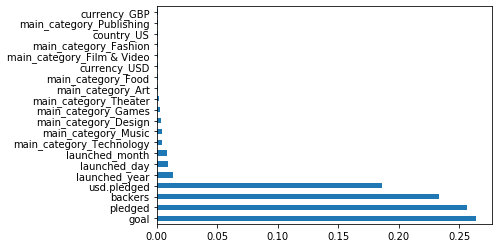

goal                          0.263292
pledged                       0.255915
backers                       0.233364
usd.pledged                   0.185909
launched_year                 0.013700
launched_day                  0.009599
launched_month                0.008151
main_category_Technology      0.004578
main_category_Music           0.004501
main_category_Design          0.003269
main_category_Games           0.002901
main_category_Theater         0.002188
main_category_Art             0.001311
main_category_Food            0.001194
currency_USD                  0.001194
main_category_Film & Video    0.001093
main_category_Fashion         0.000943
country_US                    0.000941
main_category_Publishing      0.000854
currency_GBP                  0.000704
dtype: float64


In [304]:
# plot 20 most important features
# feat_importances.nlargest(20).plot(kind='barh')
df_imp_feat.plot(kind='barh')
plt.show()
print(df_imp_feat)